# Data set clean and ready of Machine learning model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler

In [2]:
df = pd.read_excel('../Data/1645792390_cep1_dataset.xlsx')
df = pd.DataFrame(df)

In [3]:
num_var = ['age', 'restbps', 'chol', 'thalach', 'oldpeak']
cat_var = ['sex', 'cp', 'fast_bsug', 'rest_ecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [4]:
df.columns = ['age', 'sex', 'cp', 'restbps', 'chol', 'fast_bsug', 'rest_ecg','thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

In [5]:
df["thal"] = df["thal"].replace(0, np.nan)
df['thal'].fillna(df["thal"].median(), inplace=True)

In [6]:
cat_axis_name = ["Gender", "Chest Pain", "Fasting Blood Sugar", "resting ECG", "Exercise induced Angina", "Slope of ST Segment", "Number of Blood Vessels", "Thal", "Target"]
num_axis = ['age', 'resting blood pressure', 'cholesterol level', 'thalach', 'oldpeak', 'has CVD']

In [7]:
df.drop(["chol", "fast_bsug", "rest_ecg"],axis=1, inplace=True)

In [8]:
from scipy import stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize

In [56]:
winz_perc_rbp = (stats.percentileofscore(df['restbps'], 165))/100
rbp_winz = winsorize(df.restbps, (0, (1 - winz_perc_rbp)))


In [58]:
df['rbp_winz'] = rbp_winz


In [11]:
df.drop([272], axis=0, inplace=True)

In [12]:
win_perc_oldpk = (stats.percentileofscore(df['oldpeak'], 4))/100

In [13]:
oldpk_win = winsorize(df.oldpeak, (0, (1-win_perc_oldpk)))

In [14]:
df["oldpeak_winz"] = oldpk_win

In [15]:
df['oldpeak_winz_sqrt'] = np.sqrt(df['oldpeak_winz'])

In [16]:
df.drop(["oldpeak_winz"], axis=1, inplace=True)

In [54]:
df.head()

,age,sex,cp,restbps,thalach,exang,oldpeak,slope,ca,thal,target,rbp_winz,oldpeak_winz_sqrt
0,63,1,3,145,150,0,2.3,0,0,1.0,1,145,1.516575
1,37,1,2,130,187,0,3.5,0,0,2.0,1,130,1.870829
2,41,0,1,130,172,0,1.4,2,0,2.0,1,130,1.183216
3,56,1,1,120,178,0,0.8,2,0,2.0,1,120,0.894427
4,57,0,0,120,163,1,0.6,2,0,2.0,1,120,0.774597


In [17]:
df_copy = df.copy()

In [18]:
cat_var.remove("fast_bsug")
cat_var.remove("rest_ecg")

In [19]:
df_copy = pd.get_dummies(df_copy, columns=cat_var[:-1], drop_first = True)

In [20]:
new_num = ["age", "thalach", "rbp_winz", "oldpeak_winz_sqrt"]

In [21]:
rob_scal = RobustScaler()

In [22]:
df_copy[new_num] = rob_scal.fit_transform(df_copy[new_num])

# Machine Learning Model

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X = df_copy.drop(["target"], axis=1,)
y = df_copy[["target"]]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=3)

In [26]:
X_train.head()

,age,restbps,thalach,oldpeak,rbp_winz,oldpeak_winz_sqrt,sex_1,cp_1,cp_2,cp_3,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_2.0,thal_3.0
201,0.363636,125,-0.380952,2.8,-0.25,0.615769,True,False,False,False,True,True,False,True,False,False,False,False,True
82,0.363636,102,0.222222,0.0,-1.40,-0.707107,False,False,True,False,False,False,True,True,False,False,False,True,False
187,-0.072727,124,-1.396825,2.2,-0.30,0.465497,True,False,False,False,True,True,False,True,False,False,False,False,True
259,-1.236364,120,0.920635,3.8,-0.50,0.833997,True,False,False,True,True,True,False,False,False,False,False,False,True
5,0.145455,140,-0.158730,0.4,0.50,-0.207107,True,False,False,False,False,True,False,False,False,False,False,False,False


In [27]:
y_train.head()

,target
201,0
82,1
187,0
259,0
5,1


In [28]:
print(f"X_train: {X_train.shape[0]}")
print(f"y_train: {y_train.shape[0]}")
print(f"X_test: {X_test.shape[0]}")
print(f"y_test: {y_test.shape[0]}")

X_train: 271
y_train: 271
X_test: 31
y_test: 31


## Machine learn: Logistic Regression -- catagorical vars


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [30]:
log_reg = LogisticRegression()
log_reg

LogisticRegression()

### 

In [31]:
log_reg.fit(X_train, y_train)

c:\Users\alvancim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\alvancim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
y_pred = log_reg.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [33]:
accur = accuracy_score(y_test, y_pred)
print("Test accuracy:{}".format(accur))

Test accuracy:0.8709677419354839


#### Test the accuracy of model

In [34]:
from sklearn.model_selection import cross_val_score
import warnings 
warnings.simplefilter('ignore')

In [35]:
scores = cross_val_score(log_reg, X_test, y_test, cv=10)
print("Cross-validation Accuracy Score", scores.mean())

Cross-validation Accuracy Score 0.8666666666666666


#### ROC curves
* Prob curve 
* measure area under curve
* higher curve from dashed line better the model

In [36]:
log_reg

LogisticRegression()

#### Making the updated ROC curve

In [37]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


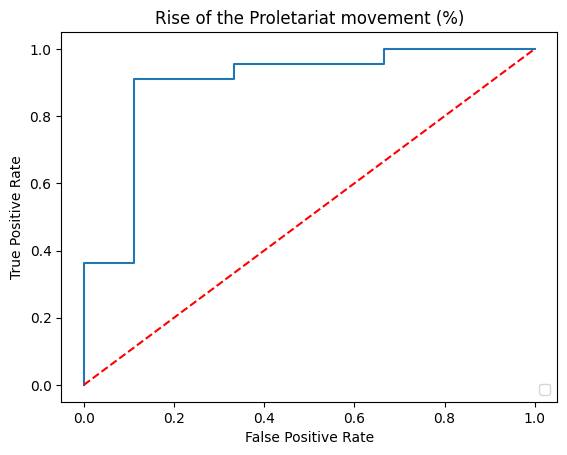

In [38]:
y_prob = log_reg.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
display = RocCurveDisplay(fpr=fpr, tpr=tpr)
display.plot()
plt.title("Rise of the Proletariat movement (%)")
plt.plot([0, 1], [0, 1], "r--")
#plt.title("Logical Regression Roc Curve and AUC")
plt.show()

* this shows our model is accurate as Cross-validation shows

#### Hyperparameter Optimization 

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
log_reg_new = LogisticRegression()

### Decision Tree

In [41]:

from sklearn.tree import DecisionTreeClassifier

In [42]:
dec_tree = DecisionTreeClassifier(random_state=5)

In [43]:
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=5)

In [44]:
y_pred = dec_tree.predict(X_test)

In [45]:
print("The test accuracy score of Decision Tree is: ", accuracy_score(y_test, y_pred))

The test accuracy score of Decision Tree is:  0.7096774193548387


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


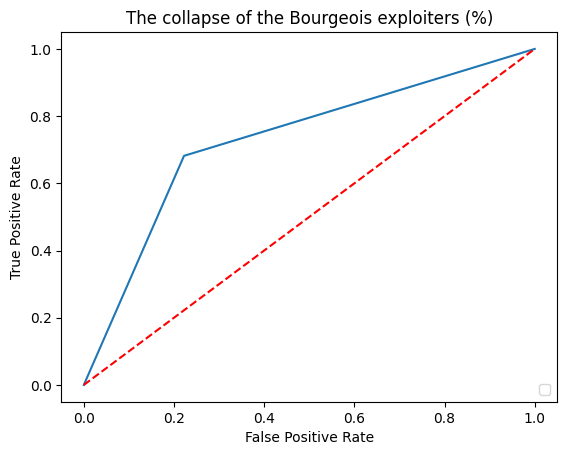

In [46]:
y_prob = dec_tree.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
display = RocCurveDisplay(fpr=fpr, tpr=tpr)
display.plot()
plt.title("The collapse of the Bourgeois exploiters (%)")
plt.plot([0, 1], [0, 1], "r--")
#plt.title("Logical Regression Roc Curve and AUC")
plt.show()


### Support Vector Machine Algorithm

In [47]:
from sklearn.svm import SVC

In [48]:
svc_mod = SVC(random_state=5)

In [49]:
svc_mod.fit(X_train, y_train)

SVC(random_state=5)

In [50]:
y_pred = svc_mod.predict(X_test)

In [51]:
print("The test accuracy score of SVM is:  ", accuracy_score(y_test, y_pred))

The test accuracy score of SVM is:   0.7419354838709677


In [52]:
scores = cross_val_score(svc_mod, X_test, y_test, cv=10)
print("Cross-validation Accuracy Score", scores.mean())

Cross-validation Accuracy Score 0.7083333333333334


In [53]:
y_prob = svc_mod.predict_proba(X_test)

AttributeError: predict_proba is not available when probability=False

In [57]:
y_prob = svc_mod.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
display = RocCurveDisplay(fpr=fpr, tpr=tpr)
display.plot()
plt.title("The collapse of the Bourgeois exploiters (%)")
plt.plot([0, 1], [0, 1], "r--")
#plt.title("Logical Regression Roc Curve and AUC")
plt.show()

AttributeError: predict_proba is not available when probability=False